In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1

from torchvision.io import read_video

video, audio, info = read_video("/fsx/rs2517/data/HDTF/cropped_videos_original/WDA_ElijahCummings_000.mp4")

/data/home/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/home/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [19]:
import torch

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20)  # Keep everything as default

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained="vggface2").eval()


# Get cropped and prewhitened image tensor
img_cropped = mtcnn(video[:10])

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding = resnet(torch.stack(img_cropped))

In [20]:
img_embedding.shape

torch.Size([10, 512])

torch.Size([224, 224, 3])


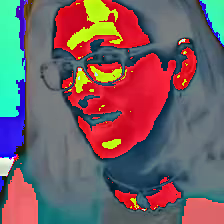

In [13]:
from PIL import Image

print(video[0].shape)
img = Image.fromarray(((video[0] + 1 / 2) * 255).numpy().astype("uint8"))
img